# Regularized Logistic Regression

In this project, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance(QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose we have the test resluts for some microchips on two tests. From these two tests, we would like to determine whether the microchips should be accepted or rejected. 

We will write functions to

- create more features, 
- compute sigmoid and cost functions,
- learning parameters using fmin_bfgs in scipy.optimize library,
- generate plots to visulaize data and how our model works.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.optimize import fmin_bfgs

## Load and Plot Data

In [3]:
# load data
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

In [4]:
# PlotData plots data points with + for positive examples and o for negative examples
def PlotData(X,y):
    pos_index = np.where(y==1)[0]
    neg_index = np.where(y==0)[0]
    plt.plot(X[pos_index,0],X[pos_index,1],'k+')
    plt.plot(X[neg_index,0],X[neg_index,1],'yo')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 1')
    plt.legend(['y = 1 ','y = 0'], loc = 1)
    plt.show()

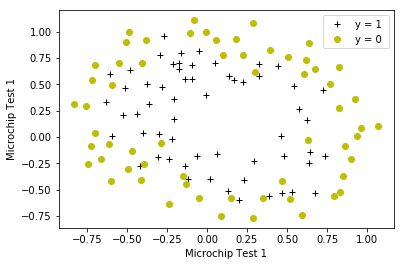

In [5]:
PlotData(X,y)

## Regularized Logistic Regression

In [6]:
# mapFeature maps the two input features to polynomial features 
def mapFeature(X1, X2):
    degree = 6
    out = np.ones([len(X1),1])
    for i in range(1, degree+1):
        for j in range(i+1):
            terms = X1**(i-j) * X2**(j)
            terms = np.reshape(terms, (len(terms),1))
            out = np.append(out, terms, 1)
    return out

In [7]:
# add polynomial features to original data
X_features = mapFeature(X[:,0], X[:,1])
X_features.shape

(118L, 28L)

In [8]:
# compute sigmoid of a variable
def sigmoid(z):
    g = 1./(1.+np.exp(-z))
    return g

In [9]:
# costFunctionReg compute cost and gradient for regularized logistic regression
def costFunctionReg(theta, X, y, reg_lambda):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    J = -np.dot(y.transpose(),np.log(h)) - np.dot((1-y).transpose(), np.log(1-h))
    theta_sqaured = np.dot(theta[1:].transpose(), theta[1:])
    J = J/m + reg_lambda/(2*m) *theta_sqaured
    grad = np.dot(X.transpose(), h-y)
    grad = grad/m
    grad[1:] = grad[1:] + (reg_lambda/m) * theta[1:]
    return J, grad

In [10]:
# initial theta
initial_theta = np.zeros(X_features.shape[1],)
# set lambda for regularization, lambda can be changed
reg_lambda = 1

In [11]:
# compute initial cost and gradient
J, grad = costFunctionReg(initial_theta, X_features, y, reg_lambda)

In [12]:
# display initial theta, cost and gradient
print('initial theta is: \n{}'.format(initial_theta))
print('Cost at initial theta: {}'.format(J))
print('Gradient at initial theta: \n{}'.format(grad))

initial theta is: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Cost at initial theta: 0.69314718056
Gradient at initial theta: 
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


## Optimizing using fmin_bfgs

In [13]:
# costReg function is the objective function passing to fmin_bfgs and get minimized.
def costReg(theta, X, y, reg_lambda):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    J = -np.dot(y.transpose(),np.log(h)) - np.dot((1-y).transpose(), np.log(1-h))
    theta_sqaured = np.dot(theta[1:].transpose(), theta[1:])
    J = J/m + reg_lambda/(2*m) *theta_sqaured
    return J

In [14]:
# gradReg function is the gradient of objective function we'll pass to fmin_bfgs 
def gradReg(theta, X, y, reg_lambda):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    grad = np.dot(X.transpose(), h-y)
    grad = grad/m
    grad[1:] = grad[1:] + (reg_lambda/m) * theta[1:]
    return grad

In [15]:
# run fmin_bfgs to obtain the optimal theta
theta_opt = fmin_bfgs(costReg, initial_theta, fprime=gradReg,args=(X_features,y,reg_lambda),maxiter=50)

         Current function value: 0.334661
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51


In [16]:
# display results
print("optimal theta to minimize cost is: \n{}".format(theta_opt))
print("cost at theta found by fmin_bfgs is: \n{}".format(costReg(theta_opt, X_features, y, reg_lambda)))

optimal theta to minimize cost is: 
[ 3.76612844  2.58145279  3.96056101 -5.48845091 -4.51390598 -6.3107119
  1.64686511 -2.14980017 -1.24380969  0.02926085 -4.81181673  0.49965584
 -2.77983724 -2.09818072 -3.77537273 -0.64535523 -1.04402829  0.691779
 -1.67783925 -2.2234603   0.2484365  -4.17173609  0.42242984 -1.1989428
  0.37463555 -1.6630537  -1.81356045 -1.66043004]
cost at theta found by fmin_bfgs is: 
0.334661299953


In [17]:
# PlotDecisionBoundary plots the data points X and Y with the decision boundary defined by theta
def PlotDecisionBoundary(theta, X, y):
    pos_index = np.where(y==1)[0]
    neg_index = np.where(y==0)[0]
    plt.plot(X[pos_index,1],X[pos_index,2],'k+')
    plt.plot(X[neg_index,1],X[neg_index,2],'yo')
    u = np.linspace(-1,1.5,50)
    v = np.linspace(-1,1.5,50)
    z = np.zeros([len(u),len(v)])
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeature(np.array([u[i]]),np.array([v[j]])),theta)
    z = z.transpose()
    plt.contour(u,v,z,[0], colors = 'green')   
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 1')
    plt.legend(['y = 1', 'y = 0','Decision boundary'], loc = 1)
    plt.show()

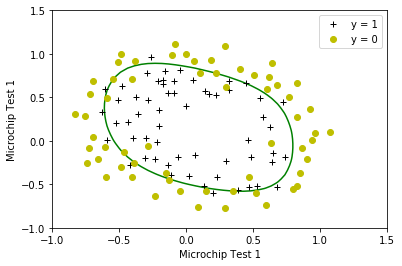

In [18]:
# plot data points with decision boundary defined by learned parameter theta
PlotDecisionBoundary(theta_opt, X_features, y)

## Predict and Accuracies

In [19]:
# predict function predict whether the label is 0 or 1 using learned logistic regression parameters theta
def predict(theta, X):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    p = np.zeros(m,)
    for i in range(m):
        if h[i] >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p

In [20]:
# compute accuracy on our training set
p = predict(theta_opt, X_features)
print("Train Accuracy is: {}%".format((p == y).sum()/float(len(y))*100))

Train Accuracy is: 84.7457627119%
